<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import time
import requests

def getMassData(lastDay=1):
    url = 'https://api.binance.com/api/v3/klines'
    current_time = int(time.time() * 1000)
    startDay = current_time - ((lastDay + 40) * 24 * 60 * 60 * 1000)
    endDay = current_time - (lastDay * 24 * 60 * 60 * 1000)

    params = {
        'symbol': 'BTCUSDT',      # The trading pair you're interested in
        'interval': '1h',         # 1-hour candlestick data (hourly prices)
        'startTime': startDay,    # Data from 300 days ago
        'endTime': endDay,        # Data until lastDay
        'limit': 960             # Maximum number of data points per request
    }

    result = []
    while  params['startTime'] <  params['endTime']:
        time.sleep(1)
        print("calisyom")
        print(params['startTime'])

        response = requests.get(url, params=params)
        data = response.json()
        print(data)
        
        if not data:  # Break if no more data is returned
            break

        for candle in data:
            close_price = candle[4]
            result.append(close_price)

        # Update startTime for the next request to get older data
        # The last candle's timestamp will be used to set the new startTime
        # startDay = data[-1][0]  # Get the timestamp of the last candle
        params['startTime'] = params['startTime'] - ((lastDay + 4) * 24 * 60 * 60 * 1000)  # Set the new start time

    return result


In [27]:
import csv

import pandas as pd

data = getMassData()

test_data = data[-10:]

train_data = data[:-10]


df = pd.DataFrame(data)

print("Size (shape):", df.shape)

df.to_csv('data/massData.csv', index=False, header=False)

calisyom
1723468895697
[[1723471200000, '58157.55000000', '60711.09000000', '57800.00000000', '60299.98000000', '5156.24546000', 1723474799999, '306875717.26339770', 265063, '2813.50559000', '167448005.48354320', '0'], [1723474800000, '60299.99000000', '60510.20000000', '59230.00000000', '60207.37000000', '2847.64813000', 1723478399999, '170319130.17460140', 170255, '1437.49391000', '86014312.67468460', '0'], [1723478400000, '60207.38000000', '60420.34000000', '59555.56000000', '59608.06000000', '1522.45273000', 1723481999999, '91196762.96032720', 101325, '715.47393000', '42863107.52593960', '0'], [1723482000000, '59608.07000000', '59919.69000000', '59255.83000000', '59296.11000000', '1335.69510000', 1723485599999, '79554530.75628570', 76256, '627.32788000', '37374850.01524400', '0'], [1723485600000, '59296.12000000', '59490.00000000', '58440.54000000', '58526.78000000', '1497.27827000', 1723489199999, '88320422.98412450', 101637, '561.39770000', '33115317.88041740', '0'], [17234892000

KeyboardInterrupt: 

In [2]:
import csv

import pandas as pd
url = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/massData.csv"


df= pd.read_csv(url, header=None)
data=df.values.tolist()
single_dimensional_list = [item[0] for item in data]


In [28]:
data=single_dimensional_list

print(len(data))

test_amount = 200

test_data = data[-test_amount:]

train_data = data[:-test_amount]

500


In [25]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = train_data  # Replace with your data

# Ensure the data is fully numeric and clean up any non-numeric entries
# Convert data to a Pandas Series first
df = pd.Series(data)

# Attempt to convert all values to numeric, coercing non-numeric values to NaN
df = pd.to_numeric(df, errors='coerce')

# Drop any NaN values that were caused by non-numeric entries
df = df.dropna()

# Check if the conversion and cleaning worked
if df.isnull().values.any():
    raise ValueError("The data still contains non-numeric values after conversion.")

# Fit the SARIMAX model (adjust p, d, q, and seasonal parameters as needed)
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the order if necessary
model_fit = model.fit(disp=False)

# Forecast the next 10 values
forecast = model_fit.forecast(steps=test_amount)

# Print the forecasted values
print(forecast.to_list())
print(test_data)




[44167.6618838294, 44245.9305505669, 44197.06970521783, 44275.821344374126, 44304.44540450815, 44305.23145417159, 44337.189613148475, 44390.677400831584, 44449.6534167587, 44421.63228945392, 44417.824477792776, 44482.44093011075, 44486.76018060874, 44546.184042420806, 44509.12614584636, 44590.056055429675, 44627.38905111334, 44623.90930489334, 44649.44834818668, 44678.85278032829, 44731.11378574081, 44719.263202464994, 44721.338701049535, 44789.983630332885, 44795.300621856426, 44853.52520444559, 44817.3024480446, 44898.412073074454, 44936.352953383685, 44932.60675429518, 44957.73049668898, 44985.534481464776, 45037.35413499147, 45026.591022195644, 45029.06439468644, 45097.9820223517, 45103.368162437015, 45161.51432095322, 45125.34876513256, 45206.47140843721, 45244.4536931529, 45240.690224733604, 45265.786600266205, 45293.48383864571, 45345.27419927592, 45334.58399806349, 45337.08411154691, 45406.02007479993, 45411.41091087603, 45469.55187625359, 45433.39018580667, 45514.513729136044,

In [26]:
forecast_list = forecast.to_list()


list1 = [float(value) for value in forecast_list]
list2 = [float(value) for value in test_data]


for i in range(len(list1)):
    print(int(list1[i]) - int(list2[i]))


49
125
58
44
30
105
157
556
607
586
600
583
490
611
464
582
736
659
725
699
760
819
1008
1017
1002
1109
972
961
1052
1021
991
1210
1431
1326
1291
1213
1269
1329
1222
1378
1423
1412
1468
1333
1544
1551
1548
1776
2189
3517
3124
3350
3499
3418
3441
3359
3273
3261
3301
3504
3716
3927
3938
4028
4513
4806
5102
5051
4759
4664
4700
4305
4346
4223
4314
4745
4603
4469
4273
4181
4465
4449
4677
4481
4525
4919
5009
5095
5774
5167
5360
5296
5473
5336
5077
5227
5621
5700
5836
5845
5765
5915
5690
5566
5666
5731
5873
5737
5485
5577
5034
5184
4974
4961
4380
4267
4205
4220
4316
4466
4415
4552
4568
4652
4592
4491
4524
4688
4610
4532
4226
4467
4997
4970
5141
5073
4506
4850
4636
4837
4835
4727
4779
4982
4901
5057
5102
5173
5424
5449
5339
5195
5283
5259
5333
5573
5895
6060
6296
6488
6469
6207
6250
6153
6187
6353
6477
6578
6425
6401
6180
6308
6366
6424
6432
6502
6524
6462
6394
6376
6403
6497
6217
6312
6434
6471
6611
6656
6746
6720
6755
6957
7101
7292
7204
7211
7346
7248
7384
7404


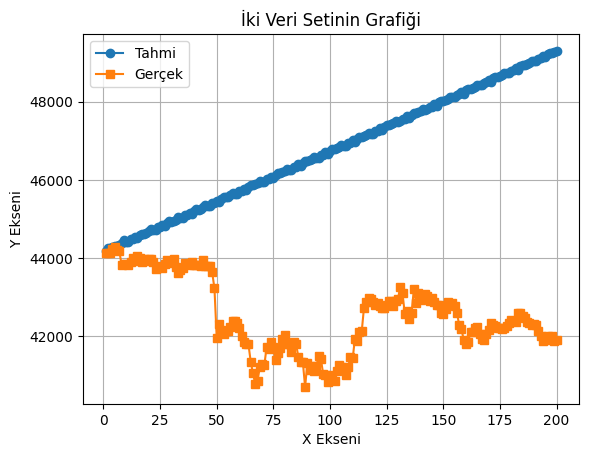

In [27]:
import matplotlib.pyplot as plt

# Örnek veriler
y1 = list1  # İlk Y ekseni verileri
y2 = list2   # İkinci Y ekseni verileri

# X eksenini otomatik olarak oluştur
x = range(1, len(y1) + 1)  # 1'den başlayarak y1'in uzunluğu kadar

# Grafiği çiz
plt.plot(x, y1, marker='o', label='Tahmi')  # İlk veri seti
plt.plot(x, y2, marker='s', label='Gerçek')  # İkinci veri seti

# Grafik özellikleri
plt.title('İki Veri Setinin Grafiği')  # Grafik başlığı
plt.xlabel('X Ekseni')  # X ekseni etiketi
plt.ylabel('Y Ekseni')  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.grid(True)  # Izgara çizgilerini göster
plt.show()  # Grafiği göster

